In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import OneHotEncoder
import time
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import warnings
warnings.filterwarnings('ignore')


In [0]:
torch.manual_seed(0)
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
device  = torch.device('cuda')

## 1. Blobs Dataset

In [0]:
data,labels = make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


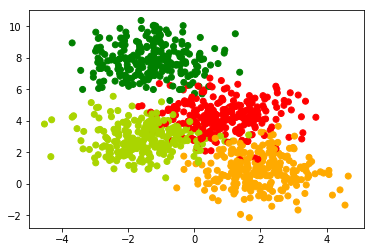

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# mapping the numpy arrays into tensors
X_train,X_test,Y_train,Y_test = map(torch.tensor, (X_train,X_test,Y_train,Y_test))
X_train, X_test = X_train.float(), X_test.float()
Y_train, Y_test = Y_train.long(), Y_test.long()

# Migrate the tensors to GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

(750, 2) (250, 2) (750,) (250,)


In [0]:
torch.argmax(Y_train,dim=0)

tensor(32, device='cuda:0')

## Neural Network Class

In [0]:
class NeuralNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
      nn.Linear(2,4),
      nn.Sigmoid(),
      nn.Linear(4,2),
      nn.Tanh(),
      nn.Linear(2,4),
      nn.Softmax()
    )
    
  def forward(self,X):
    return self.net(X)
  

def accuracy(Y_true,Y_pred):
  return torch.sum(Y_true==torch.argmax(Y_pred,dim=1)).item()/len(Y_true)*100
  
  
# model - neural network object 
# opt - optimizer function - it can be GD, momentum etc
# loss function - cross entropy, mse etc

def fit(X,Y,X_val,Y_val,model,opt,loss_fn,epochs=1000):
  # bookeeping 
  err = []
  val = False
  
  if X_val is not None and Y_val is not None:
    val = True
    err_val = []
  
  for epcoh in range(epochs):
    loss = loss_fn(model(X),Y)
    err.append(loss)
    
    if val:
      err_val.append(loss_fn(model(X_val),Y_val))
    
    loss.backward()
    opt.step()
    opt.zero_grad()
  
  fig,ax1 = plt.subplots()
  ax1.plot(err,'r-')
  if val:
    ax1.plot(err_val,'b-')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel(loss_fn.__name__) 
  
  print('Accuracy on training: ',accuracy(Y,model(X)))
  if val:
    print('Accuracy on validation: ',accuracy(Y_val,model(X_val)))
  

Accuracy on training:  94.13333333333334
Accuracy on validation:  93.60000000000001


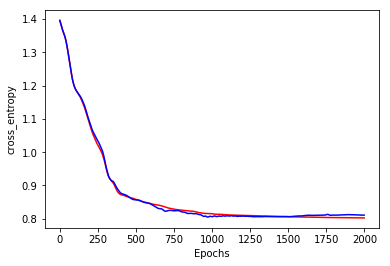

In [0]:
model_1 = NeuralNetwork()
model_1.to(device)
opt = optim.Adam(model_1.parameters(),lr=0.01,betas=(0.99,0.99)) # optimizer
loss_fn = F.cross_entropy

fit(X_train,Y_train,X_test,Y_test,model_1,opt,loss_fn,epochs=2000)

## 2. Circles Dataset

In [0]:
data,labels = make_circles(n_samples=1000,noise=0.05,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


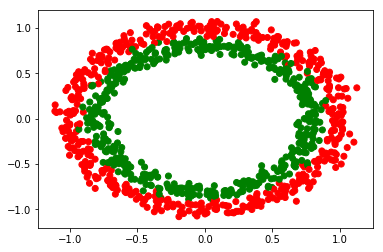

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# mapping the numpy arrays into tensors
X_train,X_test,Y_train,Y_test = map(torch.tensor, (X_train,X_test,Y_train,Y_test))
X_train, X_test = X_train.float(), X_test.float()
Y_train, Y_test = Y_train.long(), Y_test.long()

# Migrate the tensors to GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

(750, 2) (250, 2) (750,) (250,)


In [0]:
class NeuralNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
      nn.Linear(2,4),
      nn.Sigmoid(),
      nn.Linear(4,3),
      nn.Tanh(),
      nn.Linear(3,4),
      nn.Softmax()
    )
    
  def forward(self,X):
    return self.net(X)
  

def accuracy(Y_true,Y_pred):
  return torch.sum(Y_true==torch.argmax(Y_pred,dim=1)).item()/len(Y_true)*100
  
  
# model - neural network object 
# opt - optimizer function - it can be GD, momentum etc
# loss function - cross entropy, mse etc

def fit(X,Y,X_val,Y_val,model,opt,loss_fn,epochs=1000):
  # bookeeping 
  err = []
  val = False
  
  if X_val is not None and Y_val is not None:
    val = True
    err_val = []
  
  for epcoh in range(epochs):
    loss = loss_fn(model(X),Y)
    err.append(loss)
    
    if val:
      err_val.append(loss_fn(model(X_val),Y_val))
    
    loss.backward()
    opt.step()
    opt.zero_grad()
  
  fig,ax1 = plt.subplots()
  ax1.plot(err,'r-')
  if val:
    ax1.plot(err_val,'b-')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel(loss_fn.__name__) 
  
  print('Accuracy on training: ',accuracy(Y,model_1(X)))
  if val:
    print('Accuracy on validation: ',accuracy(Y_val,model_1(X_val)))
  

Accuracy on training:  98.4
Accuracy on validation:  97.6


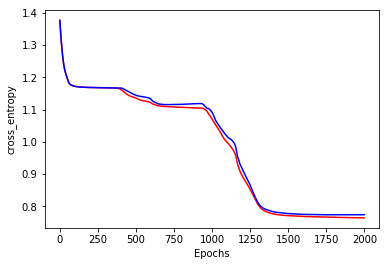

In [0]:
model_1 = NeuralNetwork()
model_1.to(device)
opt = optim.Adam(model_1.parameters(),lr=0.01,betas=(0.9,0.99)) # optimizer
loss_fn = F.cross_entropy

fit(X_train,Y_train,X_test,Y_test,model_1,opt,loss_fn,epochs=2000)